## To replicate the sentiment analysis with data from twitter:
### A. Start a notebook instance in machine Learning Lab 
### B. Open the example link and download the source code from Github repository.
### C. Copy, paste and modify the python code file in the notebook

In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 8.4 MB/s eta 0:00:0000:01
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 719.2 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 26.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 33.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=9e7dea1e0d9c70303108e0c07606a4ebad044774784a9ed1dcc384f77e642be4
  Stored in directory: /home/ec2-user/.cache/pip/wheels/62/4a/9c/7a46699df9efb845aa116fae5e52d8690fc44

In [2]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ec2-user/nltk_data...


True

# Step 2: Authentication for Twitter API

In [5]:
# Authentication
consumerKey = "2CJbp8m7Rg26LtZEKAeVXWceG"
consumerSecret = "IbULWKlS0uvhLnMTcFkzvMjDfZUcBM6eVbdLYMUbNafhieX8Y6"
accessToken = "1119095264961126402-8QDK0FvTjGmV7w1hUtGsTyCyH77bNE"
accessTokenSecret = "unheMaBnZsHrcBt3mK1bE8Ib4wtE3tPtAwSA65Y0zWIK0"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Step 3: Getting Tweets With Keyword or Hashtag

In [13]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []



for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
 


Please enter keyword or hashtag to search:  UCM
Please enter how many tweets to analyze:  300


In [14]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  300
positive number:  64
negative number:  51
neutral number:  185


In [15]:
tweet_list

,0
0,RT @peterjordan100: Geral falando bem de Guard...
1,RT @zebazcr: Ni se estrena y ya la odian. 😂\n\...
2,RT @peterjordan100: Geral falando bem de Guard...
3,Sobre guardiões da galáxia 3:\nFilmao do caral...
4,RT @peterjordan100: Saiu video do Raluca e a g...
...,...
295,RT @peterjordan100: Geral falando bem de Guard...
296,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
297,Doida pra ver esse guardiões da galáxia 3… ach...
298,RT @DepDocHppss: Todos presentes en el desfile...


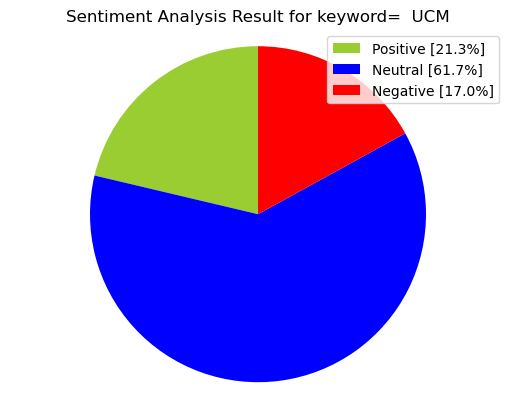

In [16]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [18]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [19]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @peterjordan100: Geral falando bem de Guard...,RT @peterjordan100: Geral falando bem de Guard...
1,RT @zebazcr: Ni se estrena y ya la odian. 😂\n\...,RT @zebazcr: Ni se estrena y ya la odian. 😂\n\...
3,Sobre guardiões da galáxia 3:\nFilmao do caral...,Sobre guardiões da galáxia 3:\nFilmao do caral...
4,RT @peterjordan100: Saiu video do Raluca e a g...,RT @peterjordan100: Saiu video do Raluca e a g...
5,Buen cierre de la trilogía con #Guardianesdela...,Buen cierre de la trilogía con #Guardianesdela...
...,...,...
291,RT @Diego01852452: @Peli_Comic Dependiendo de ...,RT @Diego01852452: @Peli_Comic Dependiendo de ...
292,"Eso sí, creo que si la están inflando mucho en...","Eso sí, creo que si la están inflando mucho en..."
294,"A mais pura verdade, a série do Raluca tá rend...","A mais pura verdade, a série do Raluca tá rend..."
297,Doida pra ver esse guardiões da galáxia 3… ach...,Doida pra ver esse guardiões da galáxia 3… ach...


In [20]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...
1,RT @zebazcr: Ni se estrena y ya la odian. 😂\n\...,ni se estrena y ya la odian themarvels ...
3,Sobre guardiões da galáxia 3:\nFilmao do caral...,sobre guardi es da gal xia 3 filmao do caralh...
4,RT @peterjordan100: Saiu video do Raluca e a g...,saiu video do raluca e a galera ta mais hypad...
5,Buen cierre de la trilogía con #Guardianesdela...,buen cierre de la trilog a con guardianesdela...
6,RT @dpslastunas: 📌👉 Saludando el 5 de mayo Día...,saludando el 5 de mayo d a del fil sofo l...
8,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,top 5 villanos del ucm
9,"RT @Multiverso_GK: Y así cierra, una de las me...",y as cierra una de las mejores trilog as de...
11,@one_normal_guy Wtf un año ya?\n\nAunque no me...,normal guy wtf un a o ya aunque no me gust...
14,"RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le...",del 1 al 10 qu notan le ponen a guard...


In [21]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

/tmp/ipykernel_28769/4219357815.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...,0.000,0.000,neutral,0.000,1.000,0.000,0.0000
1,RT @zebazcr: Ni se estrena y ya la odian. 😂\n\...,ni se estrena y ya la odian themarvels ...,0.000,0.000,neutral,0.000,1.000,0.000,0.0000
3,Sobre guardiões da galáxia 3:\nFilmao do caral...,sobre guardi es da gal xia 3 filmao do caralh...,0.000,0.000,negative,0.103,0.897,0.000,-0.3400
4,RT @peterjordan100: Saiu video do Raluca e a g...,saiu video do raluca e a galera ta mais hypad...,0.000,0.000,neutral,0.000,1.000,0.000,0.0000
5,Buen cierre de la trilogía con #Guardianesdela...,buen cierre de la trilog a con guardianesdela...,0.000,0.000,negative,0.115,0.885,0.000,-0.2960
6,RT @dpslastunas: 📌👉 Saludando el 5 de mayo Día...,saludando el 5 de mayo d a del fil sofo l...,0.000,0.000,neutral,0.000,1.000,0.000,0.0000
8,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,top 5 villanos del ucm,0.500,0.500,positive,0.000,0.625,0.375,0.2023
9,"RT @Multiverso_GK: Y así cierra, una de las me...",y as cierra una de las mejores trilog as de...,0.000,0.000,neutral,0.000,1.000,0.000,0.0000
11,@one_normal_guy Wtf un año ya?\n\nAunque no me...,normal guy wtf un a o ya aunque no me gust...,-0.175,0.825,negative,0.231,0.769,0.000,-0.7184
14,"RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le...",del 1 al 10 qu notan le ponen a guard...,0.000,0.000,neutral,0.000,1.000,0.000,0.0000


In [22]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [23]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [24]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,68,60.18
negative,24,21.24
positive,21,18.58


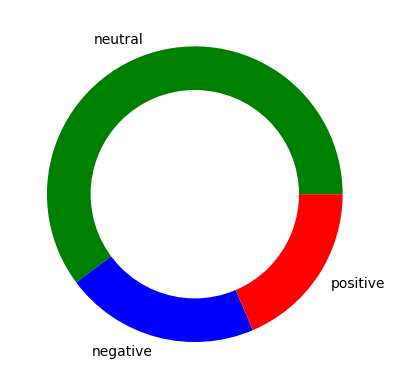

In [25]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [28]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()



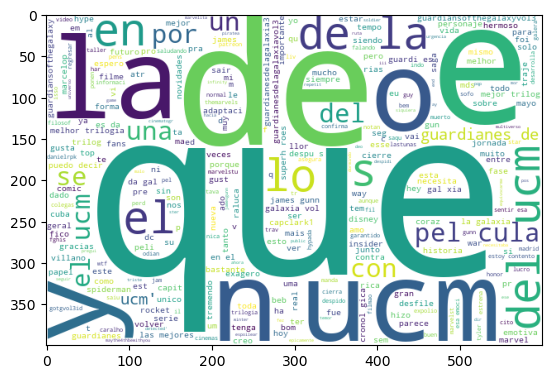

In [27]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

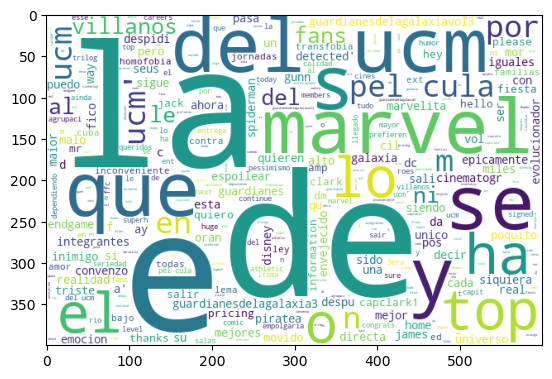

In [29]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

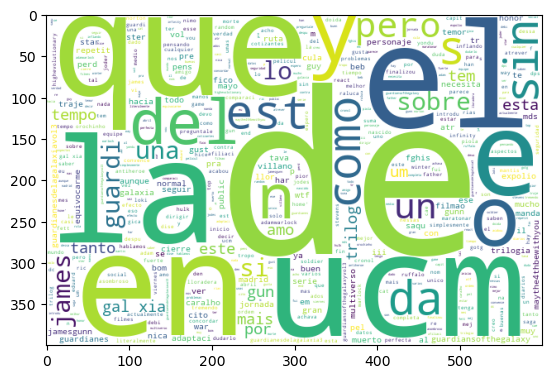

In [30]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

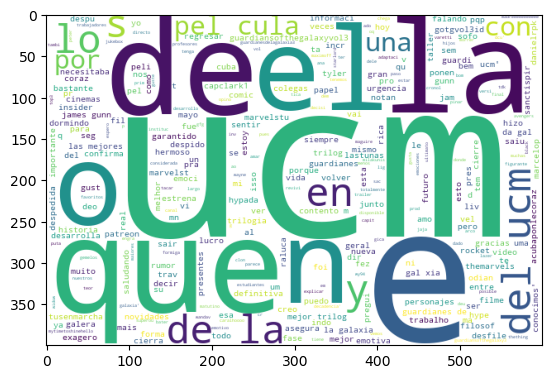

In [31]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)